[37, 42, 88, 31, 41, 82, 27, 20, 68, 94, 31, 74, 57, 64, 66, 73, 95, 39, 7, 92, 0, 37, 21, 94, 75, 12, 65, 75, 63, 36, 67, 37, 9, 43, 76, 65, 31, 31, 31, 53, 41, 3, 47, 76, 54, 10, 58, 18, 80, 72, 68, 94, 6, 49, 6, 31, 72, 93, 45, 35, 41, 20, 26, 97, 58, 70, 47, 26, 45, 47, 35, 23, 32, 35, 43, 15, 15, 59, 58, 73, 21, 37, 87, 63, 67, 67, 70, 14, 37, 49, 57, 13, 48, 51, 56, 44, 84, 45, 70, 29, 25, 14, 3, 32, 9, 22, 84, 35, 64, 64, 58, 32, 21, 44, 74, 33, 24, 76, 84, 65, 17, 43, 45, 21, 45, 58, 14, 62, 22, 70, 59, 62, 51, 14, 77, 60, 26, 95, 52, 71, 75, 18, 49, 27, 36, 61, 48, 76, 46, 55, 91, 21, 78, 52, 10, 60, 32, 46, 49, 40, 27, 16, 53, 65, 49, 29, 68, 82, 65, 20, 33, 48, 64, 40, 18, 34, 11, 36, 69, 35, 44, 32, 29, 33, 49, 21, 52, 60, 50, 28, 93, 71, 83, 15, 90, 30, 67, 37, 60, 4, 37, 38, 9, 43, 22, 69, 68, 13, 40, 65, 62, 55, 34, 39, 85, 62, 39, 58, 30, 93, 58, 72, 19, 92, 58, 55, 50, 46, 17, 29, 39, 42, 82, 7, 21, 63, 29, 75, 21, 46, 68, 98, 39, 55, 31, 44, 27, 40, 54, 23, 69, 45, 65

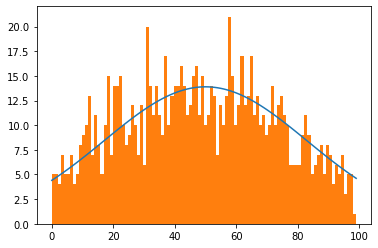

In [6]:
%matplotlib inline  

import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm



np.random.seed(1001)
num_users = 100
shard_per_user = 10
num_classes = 10
n_shard = shard_per_user*num_users
shard_per_class = int(shard_per_user * num_users / num_classes)
all_shards = list(range(num_classes)) * shard_per_class
#print(all_shards)
np.random.shuffle(all_shards)
#print(all_shards)


pdf = norm.pdf(range(num_users) , loc = int(num_users/2) , scale = int(num_users/3))
pdf = pdf / pdf.sum()
#print(pdf)
#print(np.sum(pdf))
#print(np.round(pdf*n_shard))
plt.plot(pdf*n_shard)

shard_owner = np.random.choice(range(num_users), size=n_shard-num_users, p = pdf)
shard_owner = np.concatenate((shard_owner, range(num_users)), axis=None)
print(list(shard_owner))
unbalanced_rand_set = []
for i in range(num_users): unbalanced_rand_set.append([])
for shard, owner in zip(all_shards, shard_owner):
    unbalanced_rand_set[owner].append(shard)

print(unbalanced_rand_set)
ret = plt.hist(shard_owner, bins = num_users)
cnt = ret[0]
assert(sum(cnt) == n_shard)
print(cnt)
print(max(cnt))
print(min(cnt))